In [36]:
import pandas as pd
import numpy as np
import json
import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [37]:
df = pd.read_csv("lyrics.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [38]:
df

,track_name,artist,lyrics
0,Problems In Us,Col3trane,[Pre-Chorus]I couldn't believe that you would ...
1,New Shapes,Diplo,\n\n[Chorus]\nYou don't show me no sign of you...
2,Throwaway,SG Lewis,\n\n[Verse 1]\nSometimes I know what's right f...
3,Electrian,DJ Seinfeld,NaN
4,Skip,SuperParka,\n\nI will not always be your friend\nTell you...
...,...,...,...
95,Softly,Clairo,\n\n[Verse 1]\nIs it alright to feel this way ...
96,Club Paradise - Zodivk Remix,Savy Soul,NaN
97,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,\n\n[Intro: Swarmz & Cadet]\nThis is the 9 sid...
98,Nevermind,Dennis Lloyd,[Intro]What if I left and it made no senseAnd ...


In [39]:
df = df.dropna()
df = df.loc[df['lyrics'] != "[Non-Lyrical Vocals]"]
df = df.loc[df['lyrics'] != '']

In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
song_lyrics = df['lyrics']

In [42]:
for i in range(len(song_lyrics)):
    song_lyrics[i] = re.sub("([a-z])([A-Z])", " \\1", str(song_lyrics[i])).strip()
    song_lyrics[i] = re.sub("[\(\[].*?[\)\]]", " ", str(song_lyrics[i]))
    song_lyrics[i] = re.sub(r"\s*{.*}\s*", " ", str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].replace("\n", " ")
    song_lyrics[i] = re.sub(' +', ' ', str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].lower()

In [43]:
len(song_lyrics)

66

In [44]:
df['lyrics'] = song_lyrics

In [45]:
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += list("I")

In [46]:
flat_lyrics = " ".join(df['lyrics'].values)

In [47]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_lyrics = tokenizer.tokenize(flat_lyrics)

In [48]:
lyrics_no_stop_words = [word for word in tokenized_lyrics if word not in stop_words]

In [49]:
import matplotlib.pyplot as plt

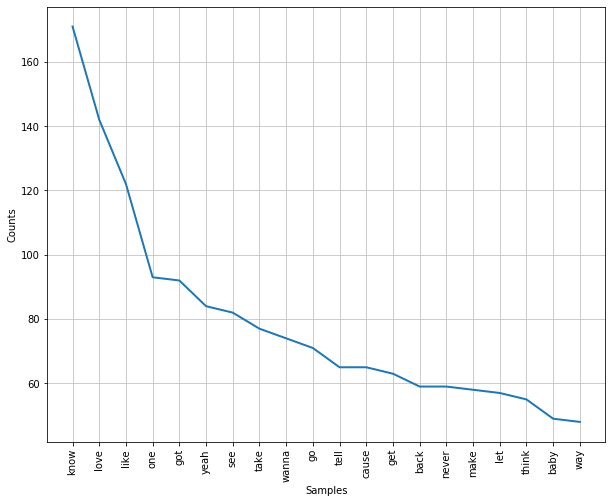

In [50]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(lyrics_no_stop_words).plot(20)
plt.show()

In [51]:
for i, row in df.iterrows():
    row['lyrics'] = re.sub("[,.]", "", str(row['lyrics']))
    row['lyrics'] = re.sub("-", " ", str(row['lyrics']))

In [52]:
df

,track_name,artist,lyrics
0,Problems In Us,Col3trane,i couldn't believe that you would cal lnother...
1,New Shapes,Diplo,you don't show me no sign of your innocent si...
2,Throwaway,SG Lewis,sometimes i know what's right for me and i'll...
3,Skip,SuperParka,i will not always be your friend tell yourself...
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,don't wanna see you by yourself by yourself b...
...,...,...,...
61,Predicament,Kllo,though to be the one i can think about it som...
62,Switch,6LACK,i'm thinking 'bout a yamaha i'm thinking 'bou...
63,Softly,Clairo,is it alright to feel this way so early? and ...
64,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,this is the 9 side cadet bea treakz don't mak...


In [53]:
sid = SentimentIntensityAnalyzer()

In [54]:
for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [55]:
df 

,track_name,artist,lyrics,neg,neu,pos,compound
0,Problems In Us,Col3trane,i couldn't believe that you would cal lnother...,0.235,0.670,0.095,-0.9660
1,New Shapes,Diplo,you don't show me no sign of your innocent si...,0.093,0.671,0.236,0.9904
2,Throwaway,SG Lewis,sometimes i know what's right for me and i'll...,0.028,0.836,0.135,0.9761
3,Skip,SuperParka,i will not always be your friend tell yourself...,0.089,0.711,0.200,0.8791
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,don't wanna see you by yourself by yourself b...,0.036,0.824,0.140,0.9899
...,...,...,...,...,...,...,...
61,Predicament,Kllo,though to be the one i can think about it som...,0.114,0.828,0.058,-0.9686
62,Switch,6LACK,i'm thinking 'bout a yamaha i'm thinking 'bou...,0.023,0.819,0.158,0.9403
63,Softly,Clairo,is it alright to feel this way so early? and ...,0.046,0.844,0.111,0.8661
64,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,this is the 9 side cadet bea treakz don't mak...,0.097,0.795,0.108,0.7970


In [123]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits import mplot3d

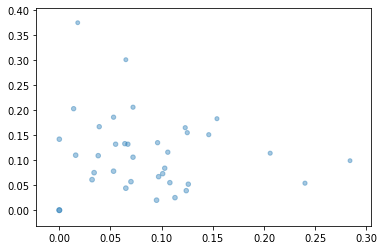

In [122]:
plt.scatter(x=df['neg'], y=df['pos'], s=df['neu']*25, alpha=0.4)

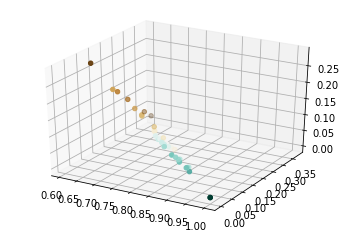

In [126]:
ax = plt.axes(projection='3d')
ax.scatter(df['neu'], df['pos'], df['neg'], c=df['neu'], cmap='BrBG', linewidth=1)